<img src="./Topol/digital fellowships_svm.png" width="100%" align="left" />

<table style="float:right;">
    <tr>
        <td>                      
            <div style="text-align: right"><a href="https://alandavies.netlify.com" target="_blank">Dr Alan Davies</a></div>
            <div style="text-align: right">Lecturer health data science</div>
            <div style="text-align: right">University of Manchester</div>
         </td>
         <td>
             <img src="https://github.com/i3hsInnovation/resources/blob/efa61022d0b8893200dad308f6590e694291f8c7/images/alan.PNG?raw=true" width="30%" />
         </td>
     </tr>
</table>

# Support Vector Machines 
****

#### About this Notebook
This notebook introduces the concept of Support Vector Machines (SVM) for Machine Learning at <code>Intermediate</code> level of learning. 

<div class="alert alert-block alert-warning"><b>Learning Objectives:</b> 
<br/> At the end of this notebook you will be able to:
    
- Investigate key features of Support Vector Machines (SVM) 

- Explore some essential Machine Learning Python libraries to implement Machine Learning algorithms

</div> 

<a id="top"></a>

<b>Table of contents</b><br/>

1.0 [Introduction](#intro)

2.0 [Classification Example](#classexample)

3.0 [Classification](#classification)

4.0 [Soft Margin Classification](#softmargin)

5.0 [The Kernel Trick](#kerneltrick)

6.0 [Your Turn](#youturn)

---------


<a id="intro"></a>


## Introduction

Support Vector Machines (SVMs) have actually existed for quite a long time. First invented by a Russian mathematician called <a href="https://en.wikipedia.org/wiki/Vladimir_Vapnik">Vladmir Vapnik</a> in the 1960s. SVMs are <code>geometric supervised learning models</code> and can be used for <code>binary</code> (two classes) classification and regression problems. The method is <code>non-probabilistic</code> by default.

Why use SVM?
<ul>
    <li>Linear classification</li>
    <li>Non-linear classification (with the 'kernel trick')</li>
    <li>Regression problems</li>
    <li>Outlier detection</li>
    <li>Works with small to medium sized datasets</li>
</ul>

When we want to partition data points in a dataset into distinct categories called <code>classes</code> for <code>classification</code>, we could imagine drawing a dividing line <code>decision boundary</code> to separate the data. Take for example the data in the figure below. Where would you draw the line? Here we have added two arbitrary lines to the image on the left below. Both separate the data but if we were to add new data (e.g. the red data point on the image on the right), the choice of dividing line will influence which class the new data is considered to belong to. A Support Vector Machine can be used to improve this situation. SVMs work by adding <code>margins</code> to the lines that extend to the nearest data points in the classes. The line with the maximum margin is considered to be the optimal separation of the data.

<img src="./Topol/svmexmple.png" width="60%" align="left" />

Not all of the training data points are important or essential for determining the <code>decision boundary</code> between classes. The ones that are situated on the border between classes are known as <code>support vectors</code> (circled data points in the image below). This is where the name <code>Support Vector Machine</code> comes form.

When used for classification, SVMs work by partitioning data into separate groups (classes) using a <code>hyperplane</code>. This is often drawn in diagrams in 2D with a line separating the classes. The hyperplane is actually a flat surface that exists in higher dimensional space. The boundary between classes is placed halfway between them and is called the <code>maximum margin boundary/hyperplane</code>. This is seen in the image below with the separation of the 2 classes. The solid line between the 2 dashed lines is the <code>maximal margin hyperplane</code> between the two classes. 

<img src="./Topol/svm1.png" align="left" />

<div class="alert alert-success">
<strong>Note:</strong> The importance of each data point in relation to the decision boundary is determined during training. Points on the borders between the classes are known as <code>support vectors</code>.
</div>

[Return to top](#top)


----------


<a id="classexample"></a>

## A Classification Example

First let's import the Breast cancer dataset from the <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">UCI ML Breast Cancer Wisconsin (Diagnostic)</a> and the <code>pandas</code> module as it it useful for data science and supports objects like <code>data frames</code> for storing and manipulating data. This works in a similar way to a spreadsheet with columns (features) and rows (records). 

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

We also load the <code>numpy</code> module as this is optimized for numerical computing and can handle data types like arrays and matrices. 

Now we will load the dataset into a dataframe and view the <code>head</code> of the data. In this case the first 10 records. Note the <code>target</code> column at the far right of the data table output below. A value of <code>0</code> means benign (not cancer), whereas a value of <code>1</code> means it is malignant (cancer). 

In [2]:
cancer = load_breast_cancer()
data = np.c_[cancer.data, cancer.target]
columns = np.append(cancer.feature_names, ["target"])
df = pd.DataFrame(data, columns=columns)

In [3]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0.0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0.0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0.0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0.0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0.0


To output and manipulate single columns, we can enter the name of the dataframe, in this case <code>df</code> followed by square brackets and then the name of the column we want to access:

In [4]:
df['target']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

We can output several columns by name like so:

In [5]:
df[['mean symmetry','target']]

,mean symmetry,target
0,0.2419,0.0
1,0.1812,0.0
2,0.2069,0.0
3,0.2597,0.0
4,0.1809,0.0
...,...,...
564,0.1726,0.0
565,0.1752,0.0
566,0.1590,0.0
567,0.2397,0.0


<div class="alert alert-block alert-info">
<b>Task 1:</b>
<br> 
1. Try outputting <code>worst area</code>, <code>worst perimeter</code> and <code>worst texture</code> in one go.<br>
2. Using the <code>len()</code> function determine how many records are in the <code>df</code> dataframe.
</div>

In [6]:
df[['worst area','worst perimeter', 'worst texture']]

,worst area,worst perimeter,worst texture
0,2019.0,184.60,17.33
1,1956.0,158.80,23.41
2,1709.0,152.50,25.53
3,567.7,98.87,26.50
4,1575.0,152.20,16.67
...,...,...,...
564,2027.0,166.10,26.40
565,1731.0,155.00,38.25
566,1124.0,126.70,34.12
567,1821.0,184.60,39.42


In [7]:
len(df)

569

[Return to top](#top)


----------


<a id="classification"></a>


## Classification

First we need to separate the <code>features</code> (column names) from the <code>label</code> (in this case <strong>target</strong>). To do this we can use the integer location indexing from pandas to get all the columns apart from the last one (0 to -1). This saves us having to list them all by name. We will store the features in a variable called <code>X</code> and the labels in a variable called <code>y</code> as is conventional. 

<div class="alert alert-success">
    <strong>Note:</strong> We use a capital <code>X</code> and a lowercase <code>y</code>.
</div>

In [10]:
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

<div class="alert alert-block alert-info">
<b>Task 2:</b>
<br> 
Output the values of <code>X</code> and <code>y</code> using the <code>print()</code> function.
</div>

In [11]:
print("X = ")
print(X)
print("y = ")
print(y)

X = 
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
y = 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1

We can now import a function to split the dataset for us into <code>training</code> and <code>testing</code> subsets. We will have training and testing for X and for y. Here we specify the size of the test set as 25% of the data.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

First we will scale the data using the <code>StandardScaler()</code> function. This is because SVMs are sensitive to feature scales. Scaling the data can improve the decision boundary. 

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Now we can import the support vector classifier from Pythons <code>sklearn</code> library and create an instance which we will store in the variable called <code>svc</code>. 

In [15]:
from sklearn.svm import SVC
svc = SVC(gamma='scale')

<div class="alert alert-success">
    <strong>Note:</strong> We can use the <code>SVR()</code> instead of <code>SVC()</code> to solve <code>regression</code> problems.
</div>

Now we can fit the model to the data. Here we can also see that this outputs the default settings used by the classifier, such as the <code>RBF kernel</code>.

In [16]:
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

We can now use the test data to predict some data now we trained the model on our test data.

In [17]:
y_pred = svc.predict(X_test)

We can now view the accuracy of the model by outputting the training and testing accuracy. We use the <code>format</code> to round up the numbers to 2 places. If we do not do this we can get numbers with lots of digits. 

In [18]:
print("Training set accuracy: {:.2f}".format(svc.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(svc.score(X_test, y_test)))

Training set accuracy: 0.99
Test set accuracy: 0.96


We can use <code>metrics</code> to get some more specific results such as <code>precision</code> and <code>recall</code>. To learn more about these, see <a href="https://developers.google.com/machine-learning/crash-course/classification/true-false-positive-negative">True and false positives and negatives</a> and <a href="https://developers.google.com/machine-learning/crash-course/classification/accuracy">accuracy</a>.

In [19]:
from sklearn import metrics
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9473684210526315
Recall: 0.989010989010989


<div class="alert alert-block alert-info">
<b>Task 3:</b>
<br> 
    Using the <code>format()</code> function, display the <code>precision</code> and <code>recall</code> results with fewer digits after the point (e.g. 0.9885057471264368 = 0.99).
</div>

In [20]:
print("Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))
print("Recall: {:.2f}".format(metrics.recall_score(y_test, y_pred)))

Precision: 0.95
Recall: 0.99


<div class="alert alert-block alert-info">
<b>Task 4:</b>
<br> 
Go back to the cell that applys the <code>StandardScaler()</code> function. Comment out this code using the hash (<code>#</code>) symbol before each line. Then run every cell from the cell above this cell (e.g. from the cell that does the training and testing split). What happens to the accuracy of model and why? 
</div>

This is because without scaling, the features of the dataset are made of very different orders of magnitude. As mentioned previously SVMs are sensitive to feature scales. A common scaling method for SVMs is to scale values between 0 and 1 using the <code>MinMaxScaler</code>. 

Lets plot the performance of the classifier using a <code>Receiver operating characteristic</code> curve. First we load the necessary libraries.

In [22]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pylab as pl
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
random_state = np.random.RandomState(0)

Now when we run the classifier we need to set the parameter <code>probability=True</code> in order to use the subsequent probability prediction function <code>predict_proba</code>.

In [24]:
svm = SVC(kernel='rbf', probability=True)
probas_ = svm.fit(X_train, y_train).predict_proba(X_test)

Next we can compute then <code>false positive</code> (fpr) and <code>true positive</code> (tpr) rates and the <code>area under the curve</code> (auc).

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)

Finally we can output the ROC curve plot like so:

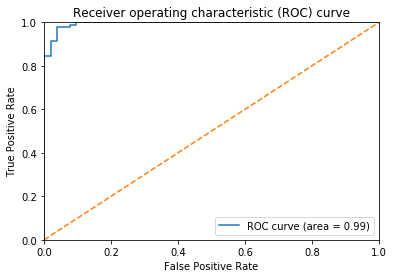

In [26]:
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], '--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic (ROC) curve')
pl.legend(loc="lower right")
pl.show()

[Return to top](#top)


----------


<a id="softmargin"></a>

## Soft Margin Classification

Using a hard margin to classify has two inherent issues. 

1. Firstly it only works with linearly separable data

2. Secondly it is very sensitive to outliers in the data

We can loosen the restrictions of the margin classification and switch from hard to soft margin classification. To do this we can vary the hyperparameter called <code>C</code>. Increasing the value of $C$ will make the margin more narrow but the number of margin violation increase and vise versa. The $C$ hyperparameter can also be reduced to try and regularise an overfitting model.  

<b>For example,</b>

[Return to top](#top)


----------


<a id="kerneltrick"></a>


## The Kernel Trick 

The <code>kernel trick</code> can be used to approach problems that are non-linear (cannot be separated with a straight line). For example the image below on the left. We can project our data into extra dimensional space in order to make the data linearly separable, as seen in the image on the right below. 

<img src="./Topol/kernel.png" align="left" />

Adding all the feature combinations and computing them could be very complex and time consuming to compute. The kernel trick allows us a way around this complexity by allowing us to 'learn the classifier' in higher dimensional space without actually having to compute it. To use this trick, we can apply a set of known kernels. These include the <code>polynomial kernel</code> and the <code>Radial Basis Function (RBF) kernel</code>.

### Polynomial kernel

$$K(x_i, x_{i^\prime}) = (1 + \sum_{j=1}^{p} x_{ij}x_{i^\prime j})^d $$

This works by computing all the polynomials (many terms) up a specified degree of the initial features.
When we increase the polynomial degree ($d$), we increase complexity of the decision boundary by adding additional higher order terms.

### Radial Basis Function (RBF) kernel

$$K(x_i,x_{i^\prime}) = exp(-\gamma \sum_{j=1}^{p} (x_{ij} - x_{i^\prime j})^2) $$

This is also known as the <code>Gaussian kernel</code>. The width of the kernel can be adjusted by changing the $\gamma$ (<code>gamma</code>) value which is defined as $\frac{1}{2\sigma^2}$. A large gamma value reduces the <code>standard deviation</code> ($\sigma$) leading to a narrow RBF kernel and vise versa. Increasing the gamma may cause the model to <code>overfit</code> the data. Too small a gamma value and the model may <code>underfit</code>. Tuning parameters like the gamma is one of the ways you can improve the performance of your model. We can change the kernels for the classifier by specifying which one we want to apply (see below). The default option is <code>rbf</code> which will be applied if we fail to specify a different kernel. We can also choose <code>linear</code>, <code>poly</code> and <code>sigmoid</code>. 

In [27]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')

We can also specify the <code>gamma</code> ($\gamma$) value directly like so:

In [28]:
from sklearn.svm import SVC
svc = SVC(gamma=0.001)

For more details on the parameters, see (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">sklearn.svm.SVC</a>).

<div class="alert alert-block alert-info">
<b>Task 5:</b>
<br> 
Go to the <a href="https://dash-gallery.plotly.host/dash-svm/">Dash</a> website and have a go playing with some of the <code>hyperparameters</code> of the SVM. What affect does this have on the algorithms performance?
</div>

[Return to top](#top)


----------


<a id="youturn"></a>

## Your Turn

<div class="alert alert-block alert-info">
<b>Task 6:</b>
<br> 
Now let's try and apply what we have learned about SVMs to a new dataset. This is the <code>pima-indians-diabetes</code> <a href="https://www.kaggle.com/kumargh/pimaindiansdiabetescsv/data">dataset</a> from Kaggle. Click on the dataset link above and read the description of the data fields (columns) in the section called <code>About this file</code> so that you understand what sort of data is contained in the dataset.
</div>

The data is the form of a <code>CSV</code> file (comma separated values). We use a pandas function to read the csv data and store it in a dataframe object. We also output the first 10 records of the data so we can get a feel for what it looks like.

In [29]:
path='./Topol/pima-indians-diabetes.csv'
data = pd.read_csv(path)
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


We can also visualize some of the features in the data using <code>scatterplots</code> as seen below. Here we are plotting the <code>Glucose</code> and <code>BMI</code> (body mass index) features and colouring the datapoints based on their class (has diabetes, does not have diabetes).

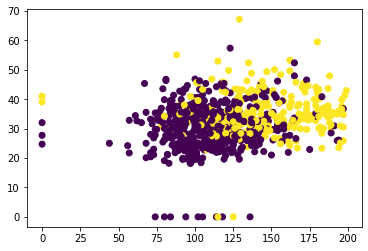

In [30]:
plt.scatter(data['Glucose'], data['BMI'], c=data['Class']);

<div class="alert alert-block alert-info">
<b>Task 7:</b>
<br> 
Using the code in the cell above output a scatter plot of 2 different features from the dataset.
</div>

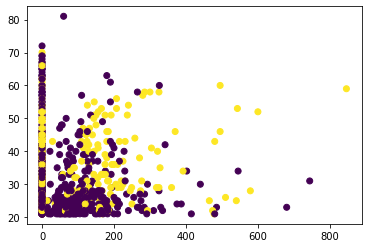

In [31]:
plt.scatter(data['Insulin'], data['Age'], c=data['Class']);

<div class="alert alert-block alert-info">
<b>Task 8:</b>
<br> 
    Using the <code>SVC()</code>, follow the previous steps to train and test a model on the new data set.
</div>

In [34]:
# split the data into features X and labels y
X = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values

# divide your data into training and testing for X and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# run the classifier and fit your model
from sklearn.svm import SVC
svc = SVC(gamma='scale')
svc.fit(X_train, y_train)

# use the feature test data to make some predictions
y_pred = svc.predict(X_test)

# output the results including training/testing accuract and precision/recal
print("Training set accuracy: {:.2f}".format(svc.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(svc.score(X_test, y_test)))
print("Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))
print("Recall: {:.2f}".format(metrics.recall_score(y_test, y_pred)))

Training set accuracy: 0.77
Test set accuracy: 0.74
Precision: 0.64
Recall: 0.48


In [35]:
# type your code here: (split the data into features X and labels y)


In [36]:
# type your code here: (divide your data into training and testing for X and y)


In [37]:
# type your code here: (run the classifier and fit your model)


In [38]:
# type your code here: (use the feature test data to make some predictions)


In [39]:
# type your code here: (output the results including training/testing accuract and precision/recal)


<div class="alert alert-block alert-info">
<b>Task 9:</b>
<br> 
1. Plot an ROC curve.<br>
2. Try changing the hpyerparameters like <code>C</code>, <code>gamma</code> and the <code>kernel</code>. Try also varying the amount of data you use for training <code>train_test_split()</code>. Can you improve the models performance?
</div>

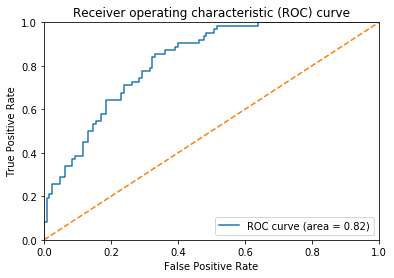

In [40]:
svm = SVC(kernel='rbf', probability=True)
probas_ = svm.fit(X_train, y_train).predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)

pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], '--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic (ROC) curve')
pl.legend(loc="lower right")
pl.show()

### Further Reading

The original SVM <a href="https://www.researchgate.net/publication/2376111_A_Training_Algorithm_for_Optimal_Margin_Classifier">paper</a>:<br>

Boser, B., Guyon, L., Vapnik, V. (1992) <u><i>A Training Algorithm for Optimal Margin Classifiers</u></i>. COLT'92: Proceedings of the fifth annual workshop on Computational Learning Theory, July 1992: pp144-152

------

#### Notebook details
<br>
<i>Notebook created by <strong>Dr. Alan Davies</strong> with, <strong>Frances Hooley</strong> and <strong>Dr. Jon Parkinson</strong>

Publish date: April 2020<br>
Review date: April 2021</i>

<strong>Note:</strong> This notebook features extracts from: <br>
<a href="https://link.springer.com/book/10.1007%2F978-3-030-47499-7#toc" target="_blank">Davies, A., Mueller, J. (2020) Developing Medical Apps and mHealth Interventions: A Guide for Researchers, Physicians and Informaticians. Springer: Switzerland</a>

Please give your feedback by using the button below:

<a class="typeform-share button" href="https://hub11.typeform.com/to/lszRaqMW" data-mode="popup" style="display:inline-block;text-decoration:none;background-color:#3A7685;color:white;cursor:pointer;font-family:Helvetica,Arial,sans-serif;font-size:18px;line-height:45px;text-align:center;margin:0;height:45px;padding:0px 30px;border-radius:22px;max-width:100%;white-space:nowrap;overflow:hidden;text-overflow:ellipsis;font-weight:bold;-webkit-font-smoothing:antialiased;-moz-osx-font-smoothing:grayscale;" target="_blank">Rate this notebook </a> <script> (function() { var qs,js,q,s,d=document, gi=d.getElementById, ce=d.createElement, gt=d.getElementsByTagName, id="typef_orm_share", b="https://embed.typeform.com/"; if(!gi.call(d,id)){ js=ce.call(d,"script"); js.id=id; js.src=b+"embed.js"; q=gt.call(d,"script")[0]; q.parentNode.insertBefore(js,q) } })() </script>

## Notes: